In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [116]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')

In [117]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips (ಎರಡೂ ಪ್ರವಾಸಗಳಿಗೆ ಬಳಸಲಾಗುವುದಿಲ್ಲ)                                                                                                                    478
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                                                                             84
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                    64
Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                                                                           31
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will not use for both trips (ಎರಡೂ ಪ್ರವಾಸಗಳಿಗೆ ಬಳಸಲಾಗುವುದಿಲ್ಲ)                                                               2
Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will not use for both trips (ಎರ

In [118]:
# Function to remove non-English text
def remove_non_english_text(text):
    return re.sub(r'\s*\([^)]*\)', '', text)

# Apply the function to the specified columns
for col in ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']:
    df[col] = df[col].apply(remove_non_english_text)

In [119]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips                                                        478
Will use for access trip                                                            84
Will use for access trip, Will use for egress trip                                  64
Will use for egress trip                                                            31
Will use for access trip, Will not use for both trips                                2
Will use for egress trip, Will not use for both trips                                2
Will use for access trip, Will use for egress trip, Will not use for both trips      1
Name: count, dtype: int64 12c(b)
Will not use for both trips                              393
Will use for access trip                                 106
Will use for access trip, Will use for egress trip        94
Will use for egress trip                                  63
Will use for egress trip, Will not use for both trips      4
Will use for access trip, Will not use for bot

In [120]:
bicycle_dict={
 'Will use for access trip, Will use for egress trip':'Will use for both trips',
 'Will use for access trip, Will use for egress trip, Will not use for both trips':'all 3 selected',
 'Will use for access trip, Will not use for both trips':'selected 1 and 3',
 'Will use for egress trip, Will not use for both trips':'selected 2 and 3',
 'Will use for egress trip':'Will use for egress trip',
 'Will not use for both trips':'Will not use for both trips',
 'Will use for access trip':'Will use for access trip'
 }

df['12c(a)']=df['12c(a)'].map(bicycle_dict)
df['12c(b)']=df['12c(b)'].map(bicycle_dict)
df['12c(c)']=df['12c(c)'].map(bicycle_dict)
df['12c(d)']=df['12c(d)'].map(bicycle_dict)
df['12c(e)']=df['12c(e)'].map(bicycle_dict)

In [121]:
print(df['12c(a)'].unique(),df['12c(b)'].unique(),df['12c(c)'].unique(),df['12c(d)'].unique(),df['12c(e)'].unique())

['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'all 3 selected'
 'selected 1 and 3' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'selected 2 and 3'
 'selected 1 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for egress trip' 'Will use for both trips' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for egress trip' 'Will use for both trips' 'selected 2 and 3'
 'selected 1 and 3']


In [122]:
for column in df.select_dtypes(include='object').columns:
    # if re.match(r'^12c\([a-e]\)$', column):
    #     df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [123]:
display(HTML(f"<h2>No of samples is {df.shape[0]}</h0>"))

In [124]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))

C:\Users\PC\AppData\Local\Temp\ipykernel_57100\3649880355.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


In [125]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips    478
Will use for access trip        84
Will use for both trips         64
Will use for egress trip        31
selected 1 and 3                 2
selected 2 and 3                 2
all 3 selected                   1
Name: count, dtype: int64 12c(b)
Will not use for both trips    393
Will use for access trip       106
Will use for both trips         94
Will use for egress trip        63
selected 2 and 3                 4
selected 1 and 3                 2
Name: count, dtype: int64 12c(c)
Will not use for both trips    451
Will use for access trip        79
Will use for both trips         66
Will use for egress trip        64
selected 2 and 3                 2
Name: count, dtype: int64 12c(d)
Will not use for both trips    410
Will use for both trips        122
Will use for access trip        74
Will use for egress trip        54
selected 2 and 3                 2
Name: count, dtype: int64 12c(e)
Will not use for both trips    460
Will use for both tri

In [126]:
# display the column 1 for the entries of 12c(a) to 12c(e) where they are 'all 3 selected'
#  'selected 1 and 3' 'selected 2 and 3'

for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        # remove such entries
        df = df[~df[column].isin(['all 3 selected', 'selected 1 and 3', 'selected 2 and 3'])]
        # print(df.loc[df[column].isin(['all 3 selected', 'selected 1 and 3', 'selected 2 and 3']), [column,'1', 'Timestamp']]) 

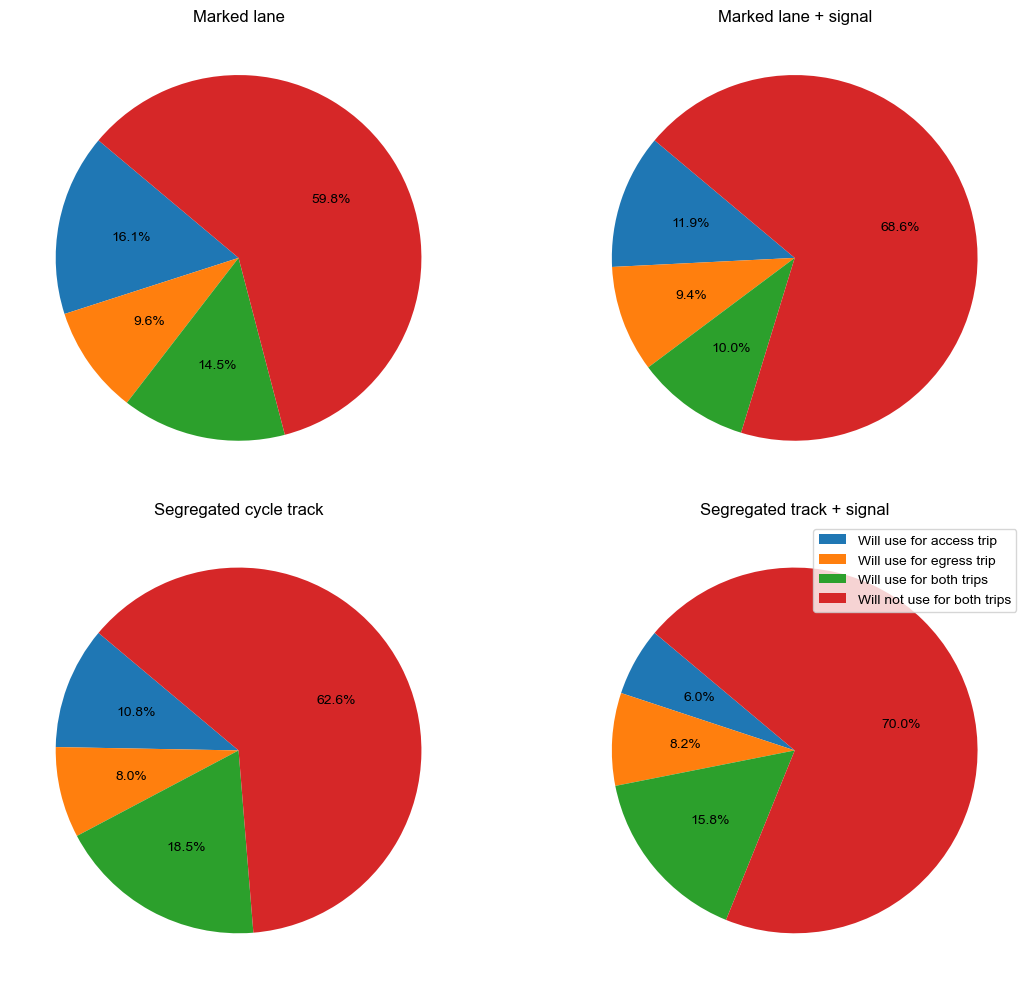

In [127]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order=['Will use for access trip' ,'Will use for egress trip','Will use for both trips','Will not use for both trips']


# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()

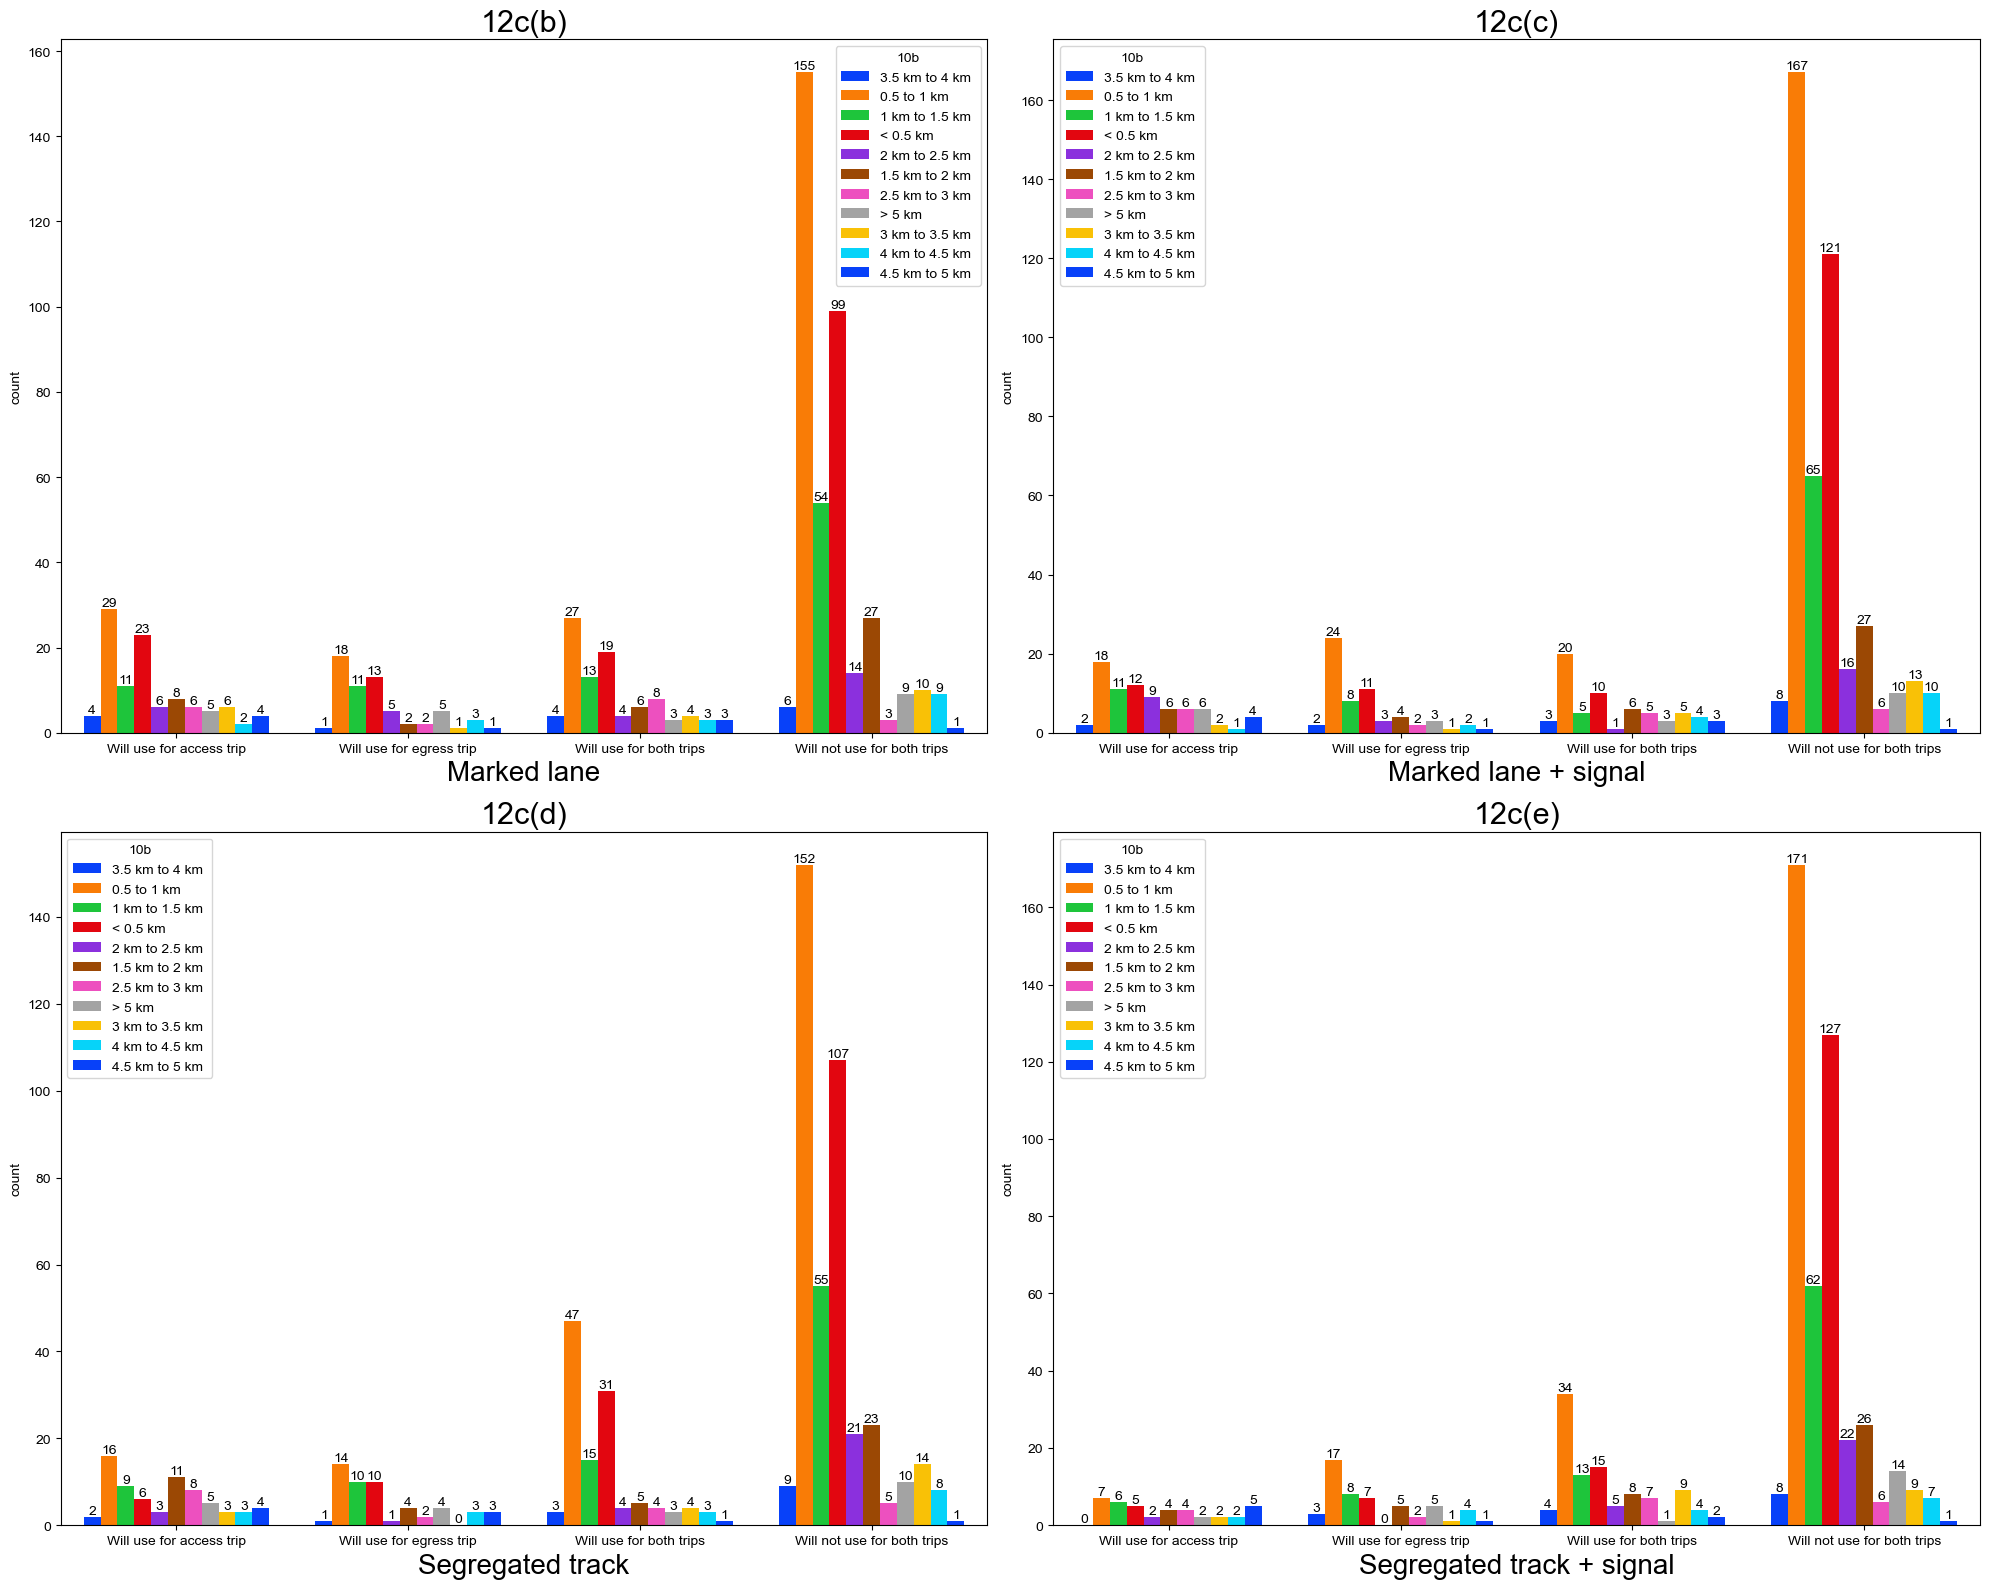

In [143]:
# Ensure the font family is set to Arial
plt.rcParams['font.family'] = 'Arial'

# Create subplots in a 2x2 grid
f, axes = plt.subplots(2, 2, figsize=(20, 16))

# Define the order and other plot parameters
order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']
titles = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']
x_labels = ['Marked lane', 'Marked lane + signal', 'Segregated track', 'Segregated track + signal']  # Custom x-axis labels

# Loop over the axes and the corresponding columns
for ax, col, title, x_label in zip(axes.flatten(), titles, titles, x_labels):
    sns.countplot(x=col, data=df, hue='10b', order=order, palette='bright', saturation=0.95, ax=ax)
    ax.xaxis.set_label_text(x_label, size=20)
    ax.set_title(title, size=22)
    for container in ax.containers:
        ax.bar_label(container, color='black', size=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
order = ['Will use for access trip', 'Will use for egress trip','Will use for both trips', 'Will not use for both trips']

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot
sns.countplot(x='12c(b)', data=df, hue='10b', order=order, palette='bright', saturation=0.95, ax=ax[0])
ax[0].xaxis.set_label_text('No cycling facility', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(x=df['12c(a)'].value_counts(), labels=order, autopct='%1.1f%%', shadow=True,
        colors=['#007bff', '#ffc107', '#28a745', '#dc3545'])
plt.axis('equal')
plt.tight_layout()

plt.show()
# plt.tight_layout()

In [129]:
df_modified= df[df['Timestamp'] > '2024-05-16 00:00:00']

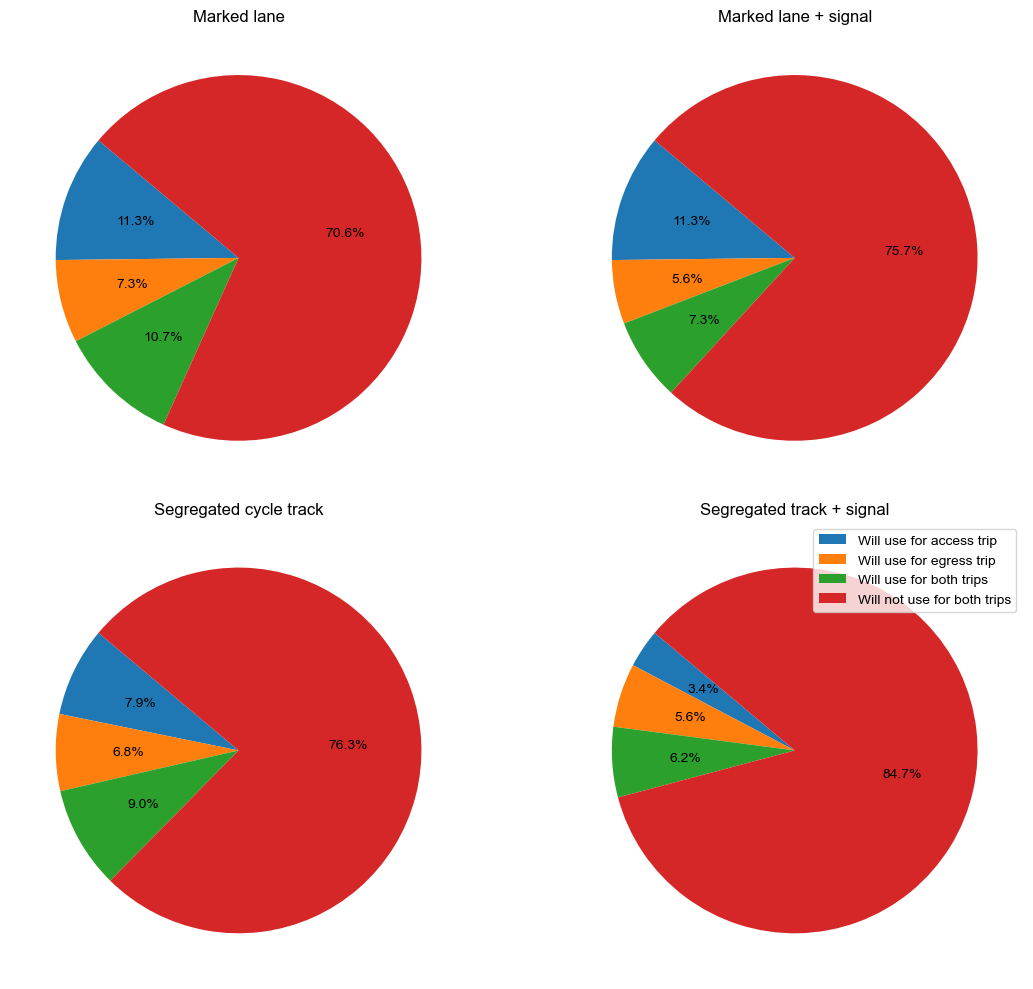

In [130]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order=['Will use for access trip' ,'Will use for egress trip','Will use for both trips','Will not use for both trips']


# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df_modified[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()